# DDoS Detection Using Multiple Machine Learning Models

Import the dataset.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/ddos.csv")
df.columns = df.columns.str.strip()
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

Clean the data

Non-numeric columns: Index(['Label'], dtype='object')


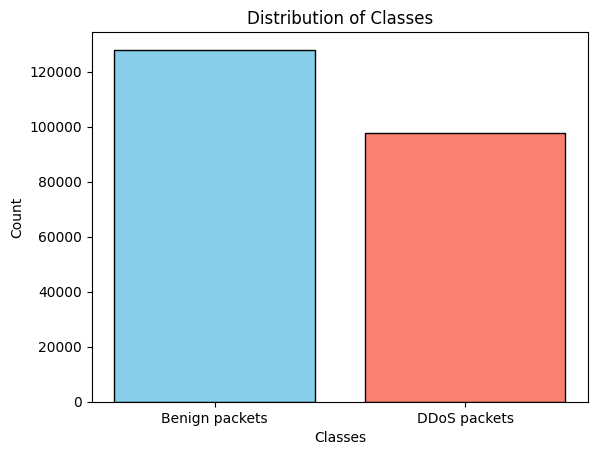

In [64]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Identify non-numeric columns in the DataFrame
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

df['Label'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})
import matplotlib.pyplot as plt

plt.bar([0, 1], df['Label'].value_counts(), color=['skyblue', 'salmon'], edgecolor='black')
plt.xticks([0, 1], labels=['Benign packets', 'DDoS packets'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)


The train dataset size =  (157997, 78)
The test dataset size =  (67714, 78)
Infinite values: 0
NaN values: 0


Train models.

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

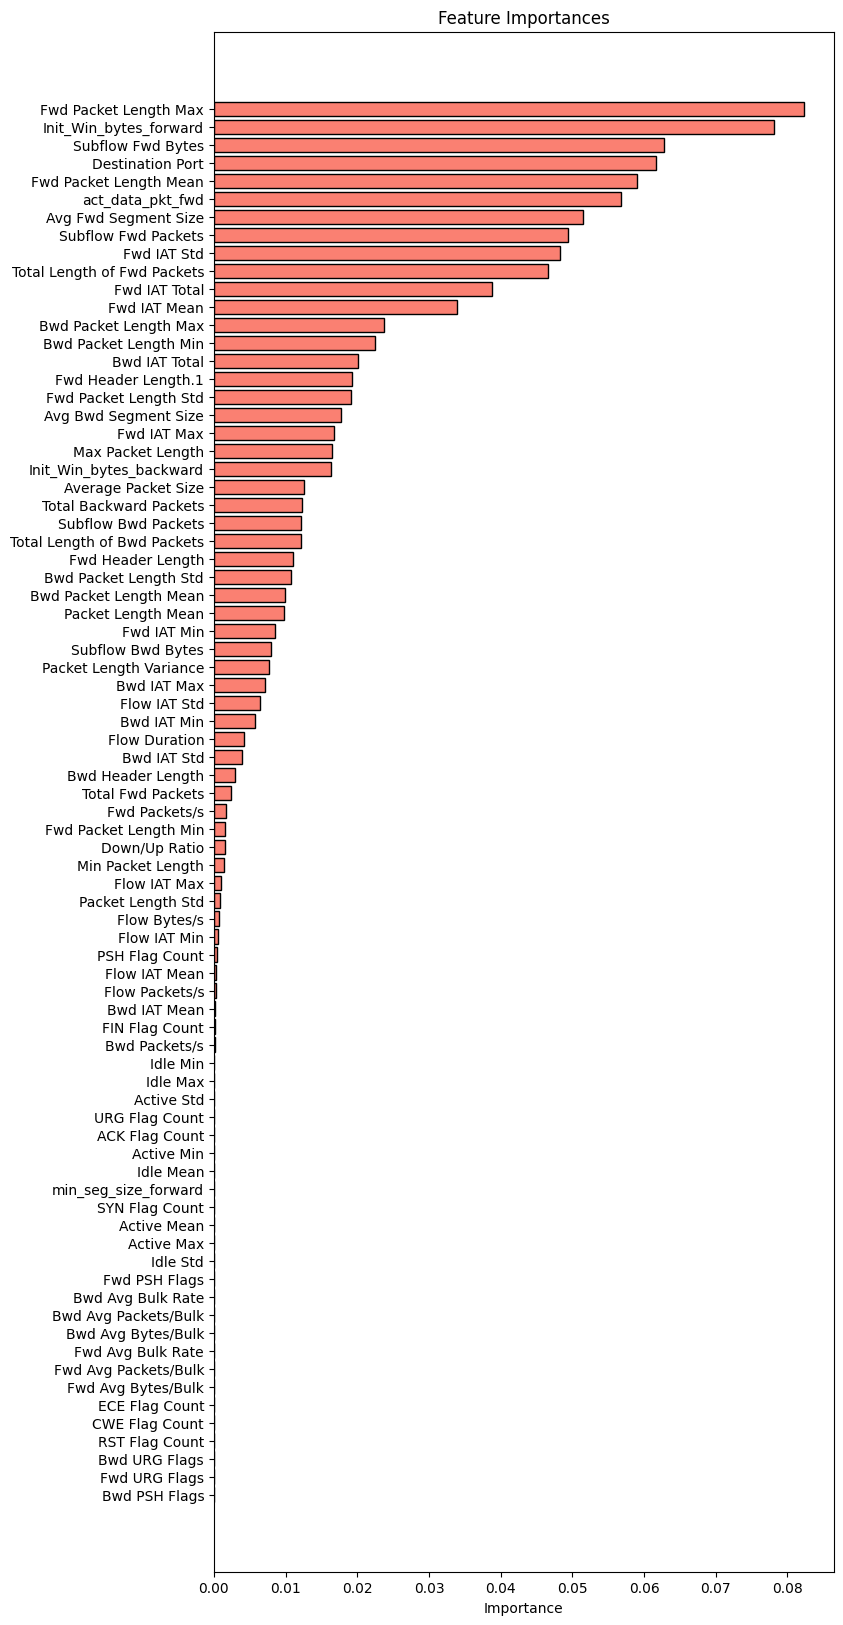

In [76]:
importances = rf_model.feature_importances_

# Sort the indices based on the importance values
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

# Use the actual feature names (assuming X_train is a pandas DataFrame)
feature_names = [X_train.columns[i] for i in indices]  # This gets the feature names corresponding to sorted indices

# Plot the feature importances
plt.figure(figsize=(8, 20))
plt.barh(range(X_train.shape[1]), importances[indices], align="center", color="salmon", edgecolor='black')
plt.yticks(range(X_train.shape[1]), feature_names)  # Set the y-ticks to the feature names
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

Perform hyperparameter tuning.

In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/Users/kanchannaik/kanchan_new_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
473 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kanchannaik/kanchan_new_venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kanchannaik/kanchan_new_venv/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/kanchannaik/kanchan_new_venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_pa

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
print('Random Forest Metrics:')
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))

Random Forest Metrics:
Accuracy: 0.9998966240363883
F1 Score: 0.9999088292371612
Precision: 1.0
Recall: 0.9998176750970229
